In [1]:
import colorstamps
import matplotlib.pyplot as plt
import scipy.interpolate
import numpy as np
import backend

In [2]:
names = ['flat',  'peak', 'abyss', 
         #'disk','cone','funnel', 
         'hsv', 'fourCorners', 'fourEdges',
         'orangeBlue', 'greenPurple', 'greenTealBlue', 
         'barrel', 'cut', 'blues', 
         'yellows', 'reds', 'greens',
        ]#'teuling0f', 'teuling1f', 'teuling3f',
         #'teuling0w', 'teuling1w', 'teuling3w']


/home/trygvrad/matplotlib/venv/lib/python3.11/site-packages/colorspacious/ciecam02.py:397: RuntimeWarning: invalid value encountered in power
  * ((27.13 * np.abs(RGBprime_a - 0.1))


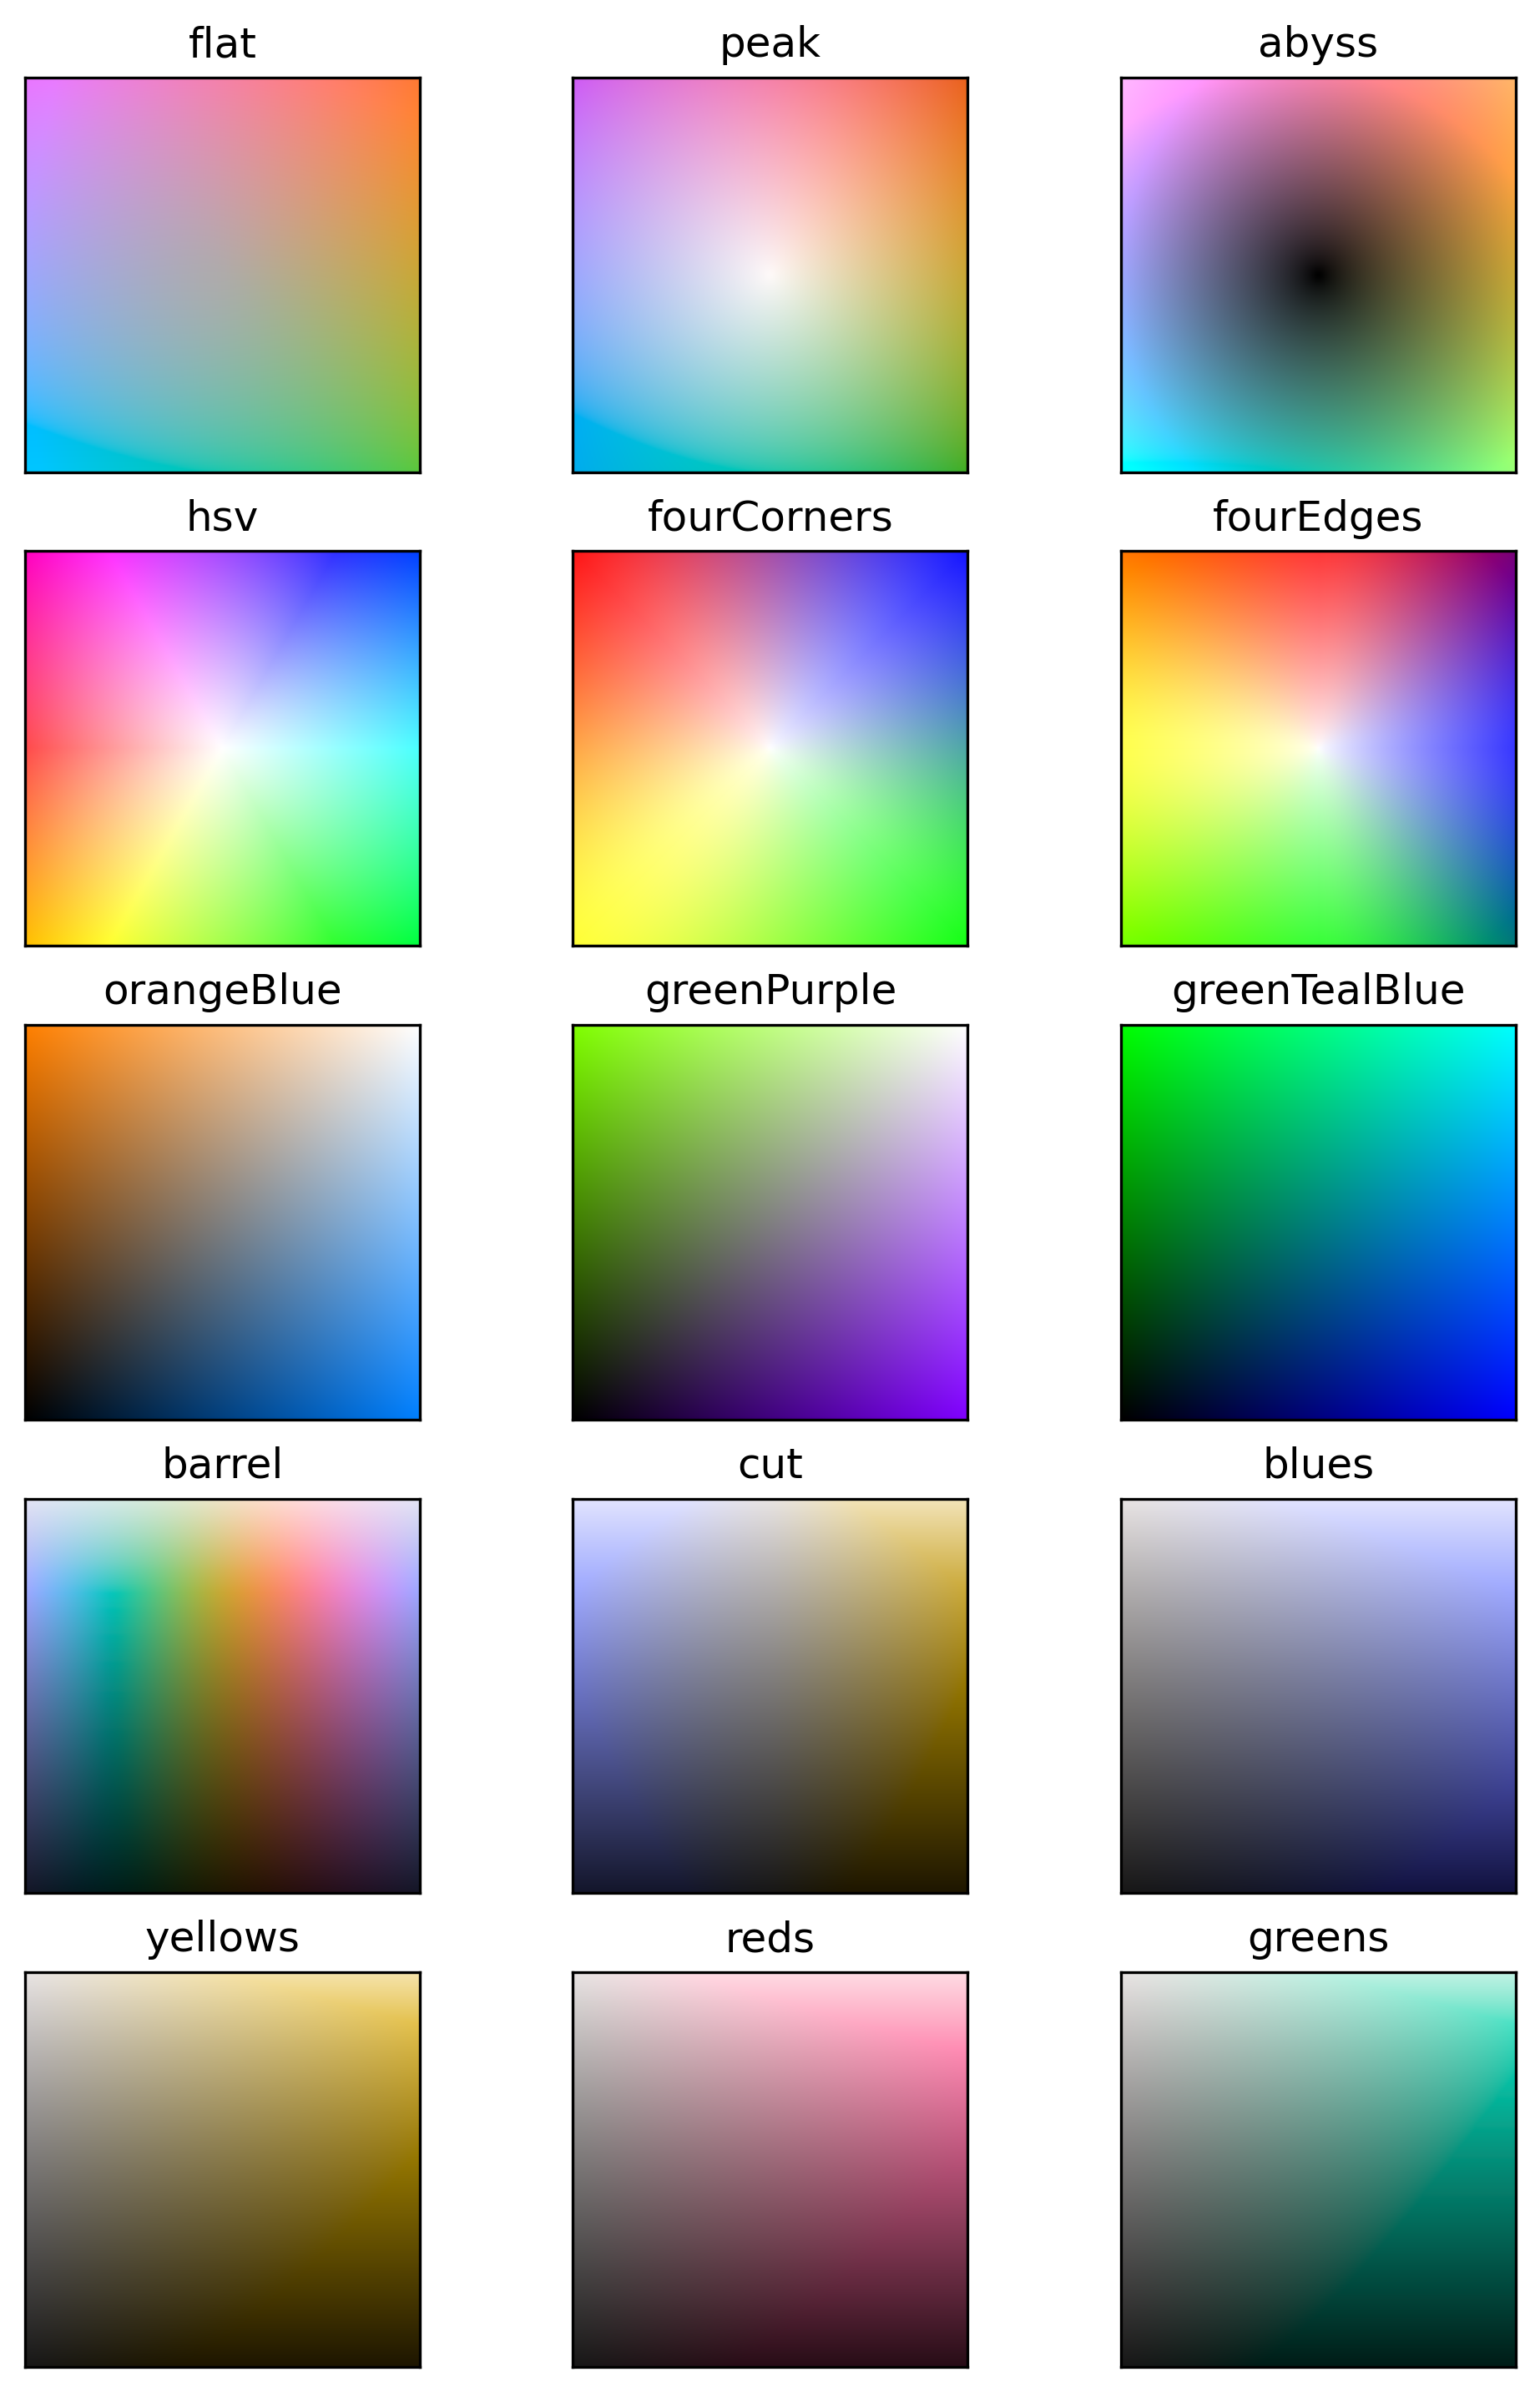

In [3]:
# reference image
fig, axes = plt.subplots(5,3, figsize = (8,19*5/8), dpi = 300)
axes = axes.ravel()

references = []

for i, name in enumerate(names):
    if name == 'peak': # gamma correction not available in colorstamps
        cmap = backend.get_var_J(J = [95,128.5], 
                                 a = (-1, 1), b = (-1, 1), 
                                 r = 33.0, l = 256, rot = 0,
                                gamma = 0.9)
    elif name == 'abyss':
        cmap = backend.get_var_J(J = [95,1], 
                                 a = (-1, 1), b = (-1, 1), 
                                 r = 33.0, l = 256, rot = 0,
                                gamma = 0.75)
    else:
        cmap = colorstamps.stamps.get_cmap(name, l = 256)
    axes[i].imshow(cmap, origin = 'lower')
    axes[i].set_title(name)
    references.append(cmap)

for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
fig.patch.set_facecolor('white')
fig.savefig(f'Bi_reference.png')

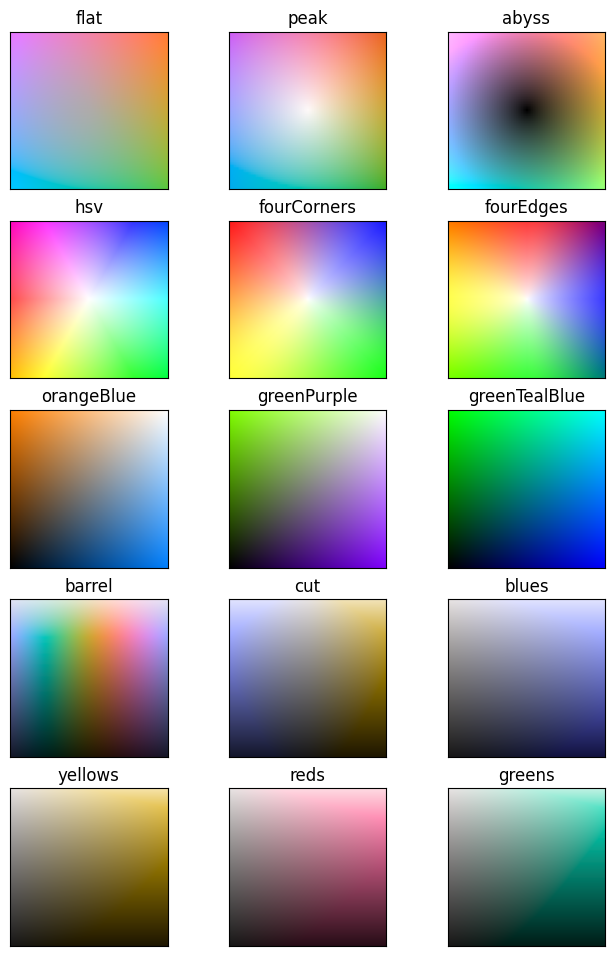

In [4]:
# encoding
fig, axes = plt.subplots(5,3, figsize = (8,19*5/8), dpi = 100)
axes = axes.ravel()

resolutions = [65, 65, 65, 
               65, 65, 65, 
               9, 9, 9,
               65, 9, 9,
               9, 9, 9]
dic = {}
for i, name in enumerate(names):
    l = resolutions[i]
    if name == 'peak': # gamma correction not available in colorstamps
        cmap = backend.get_var_J(J = [95,128.5], 
                                 a = (-1, 1), b = (-1, 1), 
                                 r = 33.0, l = l, rot = 0,
                                gamma = 0.9)
    elif name == 'abyss':
        cmap = backend.get_var_J(J = [95,1], 
                                 a = (-1, 1), b = (-1, 1), 
                                 r = 33.0, l = l, rot = 0,
                                gamma = 0.75)
    else:
        cmap = colorstamps.stamps.get_cmap(name, l = 256)
    #cmap = (cmap*255+0.5).astype(np.uint8)
    axes[i].imshow(cmap, origin = 'lower')
    axes[i].set_title(name)
    dic[name] = cmap
for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
fig.patch.set_facecolor('white')
fig.savefig(f'Bi_encoded_reduced.png')


In [5]:
import datetime
output_string = f'# auto-genreated by https://github.com/trygvrad/multivariate_colormaps\n'
output_string += f'# date: {str(datetime.datetime.today())[:10]}\n\n'

output_string += 'import numpy as np\n'
output_string += 'from matplotlib.colors import SegmentedBivarColormap\n\n'
cmap_names = []
for i, name in enumerate(names):
    l = resolutions[i]
    if name == 'peak': # gamma correction not available in colorstamps
        cmap = backend.get_var_J(J = [95,128.5], 
                                 a = (-1, 1), b = (-1, 1), 
                                 r = 33.0, l = l, rot = 0,
                                gamma = 0.9)
    elif name == 'abyss':
        cmap = backend.get_var_J(J = [95,1], 
                                 a = (-1, 1), b = (-1, 1), 
                                 r = 33.0, l = l, rot = 0,
                                gamma = 0.75)
    else:
        cmap = colorstamps.stamps.get_cmap(name, l = l)
    cmap = cmap.ravel()
    cmap_names.append(f'Bi{name[0].upper()+name[1:]}')
    output_string += f'{cmap_names[-1]} = np.array(\n    ['
    for i in range(len(cmap)):
        if i%10 ==0 and i>0:
            output_string = output_string[:-1] + '\n     '
        output_string += f'{cmap[i]:.3f}, '
    output_string = output_string[:-1]+ f'\n     ]).reshape(({l}, {l}, 3))\n\n'

output_string += 'cmaps = {\n'
for name in cmap_names:
    shape = 'square'
    output_string += f'    "{name}": SegmentedBivarColormap(\n        {name}, "{name}", 256, "square"),\n'
output_string += f'    "BiDisk": SegmentedBivarColormap(BiFlat, "BiDisk", 256, "circle"),\n'
output_string += f'    "BiCone": SegmentedBivarColormap(BiPeak, "BiCone", 256, "circle"),\n'
output_string += f'    "BiFunnel": SegmentedBivarColormap(BiAbyss, "BiFunnel", 256, "circle"),\n'

output_string += '}\n'

print(output_string[0:100])    
with open('_cm_bivar.py','w') as f: 
    f.write(output_string)

/home/trygvrad/matplotlib/venv/lib/python3.11/site-packages/colorstamps/stamps.py:547: RuntimeWarning: invalid value encountered in divide
  fac = 1.2*((np.abs(f0)+np.abs(f1))/np.sqrt(f0**2+f1**2))**-0.3


# auto-genreated by https://github.com/trygvrad/multivariate_colormaps
# date: 2024-05-24

import nu


# Load and reconstruct cmaps

In [6]:
# make spoof package for test import 
s = 'import matplotlib.colors\n'
for l in output_string.split('\n'):
    if not 'SegmentedBivarColormap' in l:
        s+= l+'\n'
    else:
        if 'SegmentedBivarColormap' in l:
            s+= l.replace('SegmentedBivarColormap(', 'matplotlib.colors.SegmentedBivarColormap(')
print(s[-500:])
with open('_temp.py','w') as f: 
    f.write(s)

import _temp as _cm_bivar
_cm_bivar.cmaps.keys()

BiYellows", 256, "square"),
    "BiReds": matplotlib.colors.SegmentedBivarColormap(        BiReds, "BiReds", 256, "square"),
    "BiGreens": matplotlib.colors.SegmentedBivarColormap(        BiGreens, "BiGreens", 256, "square"),
    "BiDisk": matplotlib.colors.SegmentedBivarColormap(BiFlat, "BiDisk", 256, "circle"),    "BiCone": matplotlib.colors.SegmentedBivarColormap(BiPeak, "BiCone", 256, "circle"),    "BiFunnel": matplotlib.colors.SegmentedBivarColormap(BiAbyss, "BiFunnel", 256, "circle"),}




dict_keys(['BiFlat', 'BiPeak', 'BiAbyss', 'BiHsv', 'BiFourCorners', 'BiFourEdges', 'BiOrangeBlue', 'BiGreenPurple', 'BiGreenTealBlue', 'BiBarrel', 'BiCut', 'BiBlues', 'BiYellows', 'BiReds', 'BiGreens', 'BiDisk', 'BiCone', 'BiFunnel'])

BiFlat (65, 65)
BiPeak (65, 65)
BiAbyss (65, 65)
BiHsv (65, 65)
BiFourCorners (65, 65)
BiFourEdges (65, 65)
BiOrangeBlue (9, 9)
BiGreenPurple (9, 9)
BiGreenTealBlue (9, 9)
BiBarrel (65, 65)
BiCut (9, 9)
BiBlues (9, 9)
BiYellows (9, 9)
BiReds (9, 9)
BiGreens (9, 9)


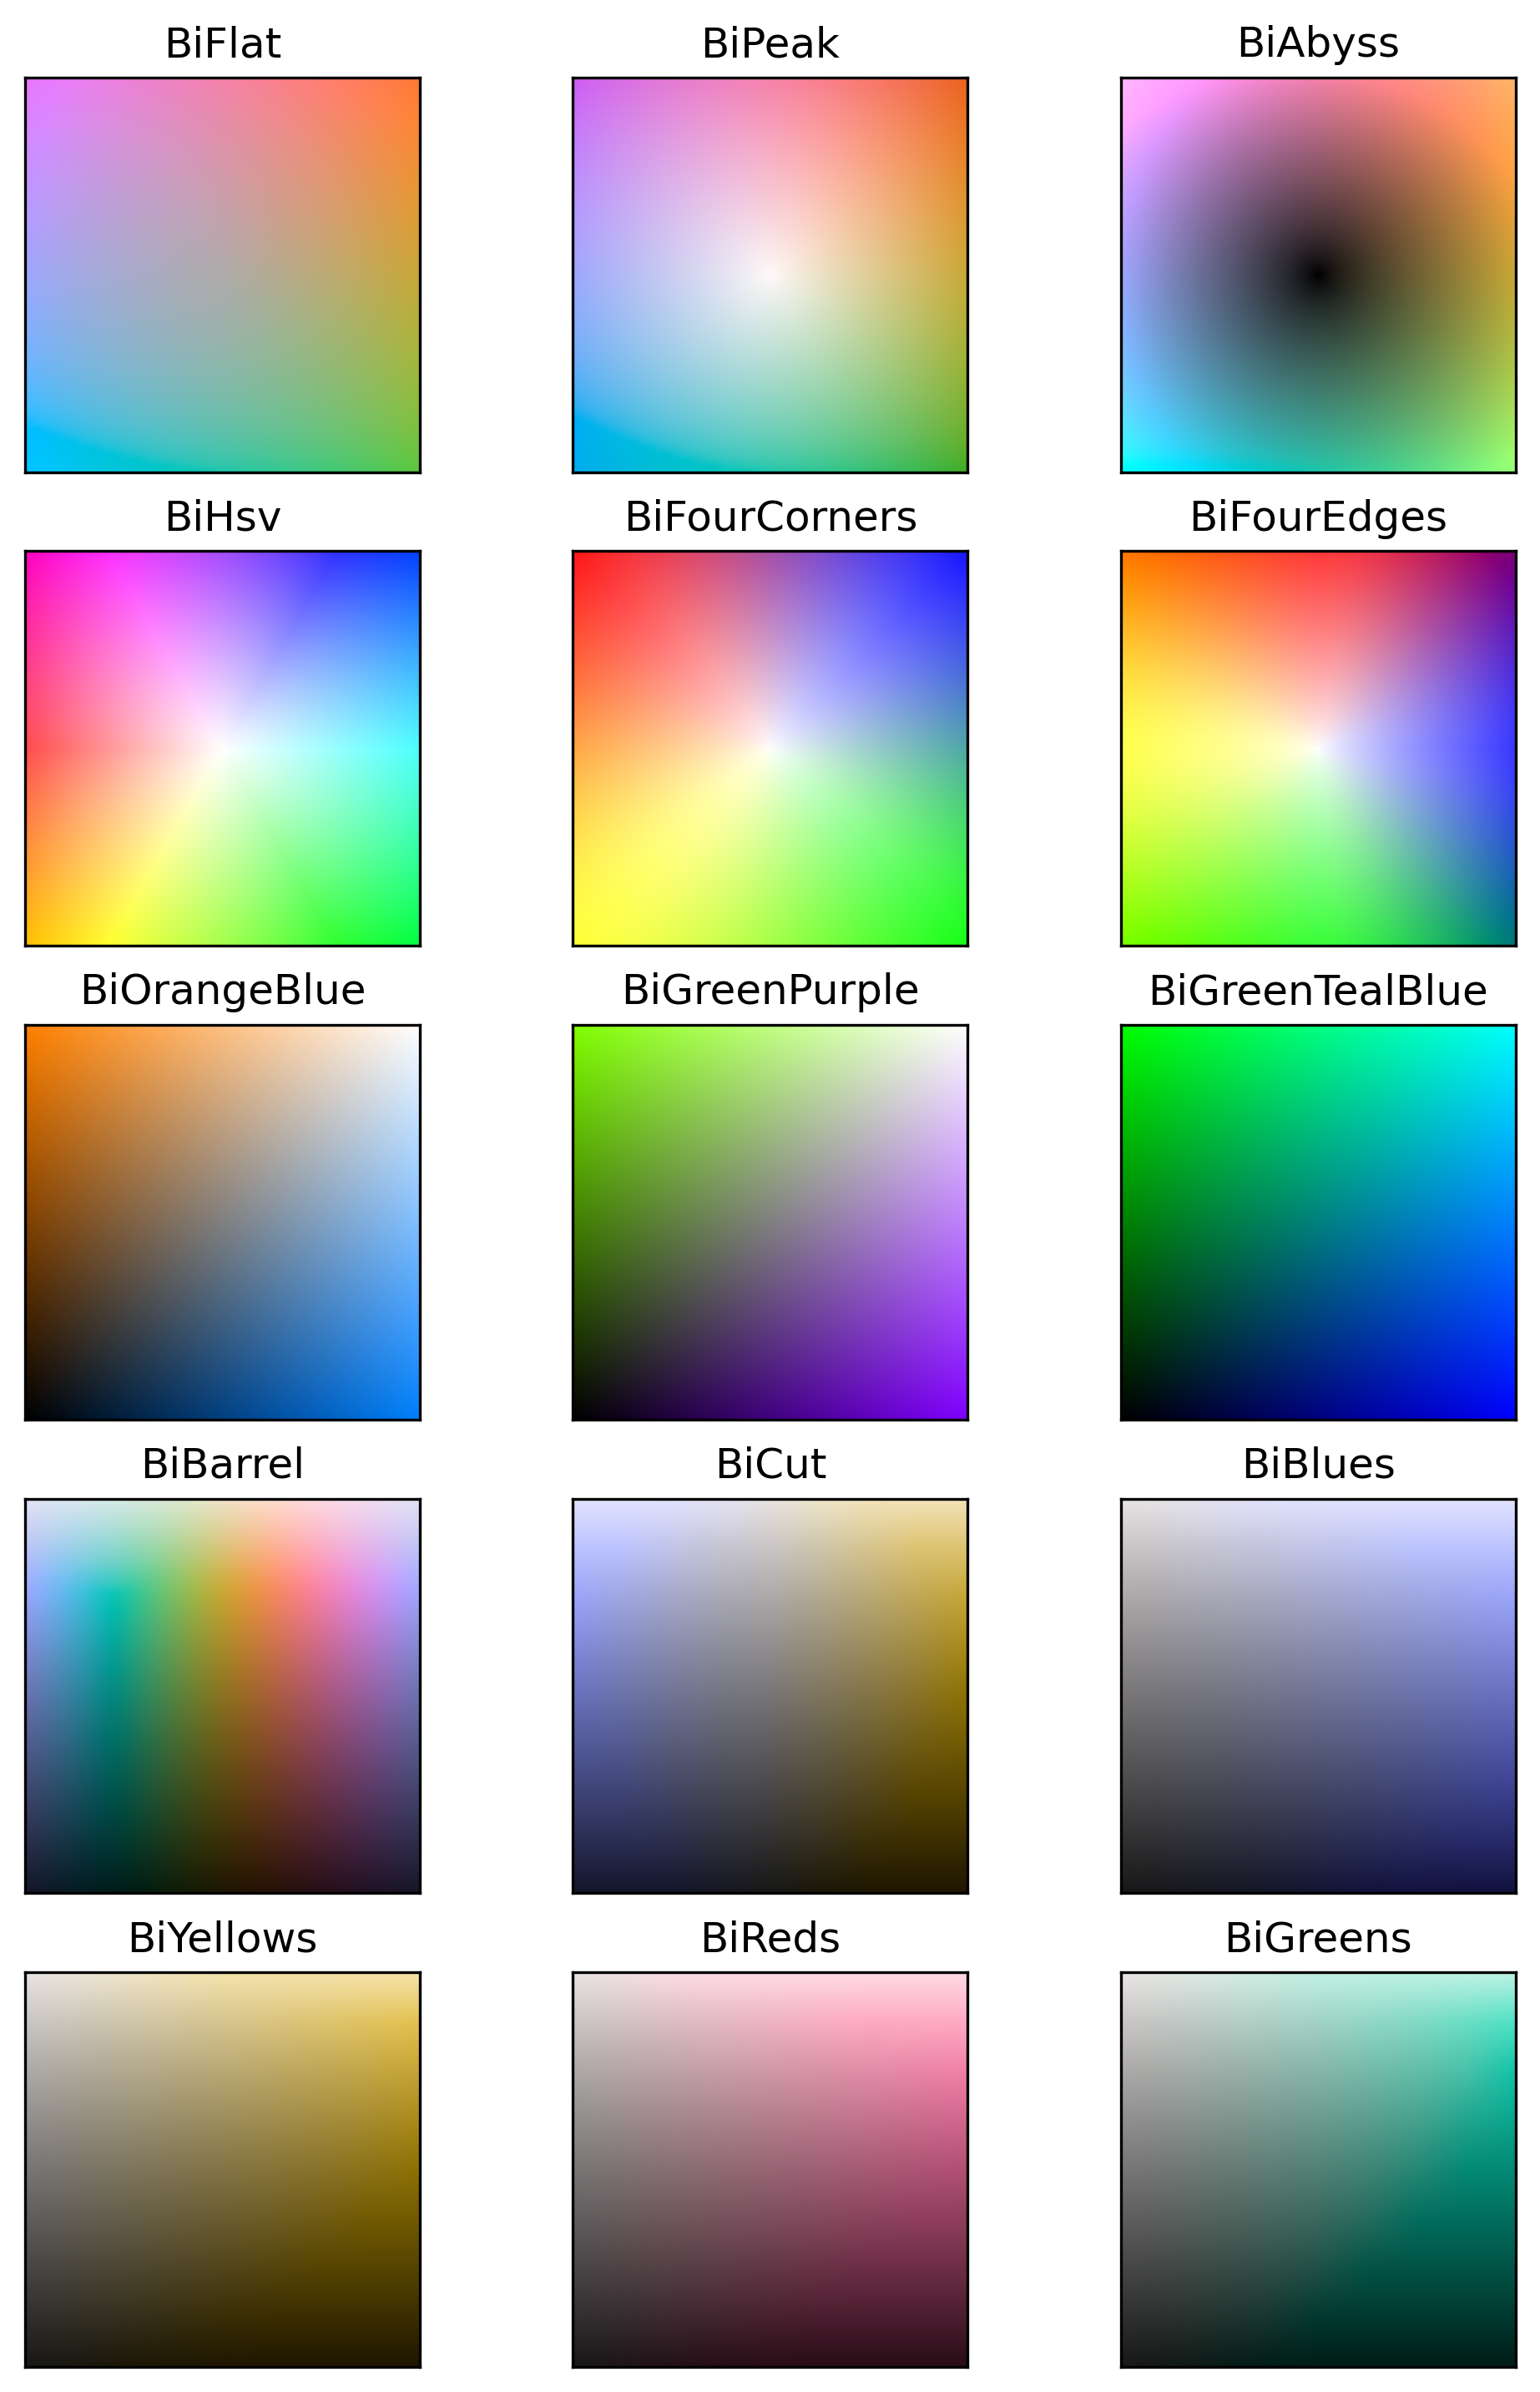

In [7]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.transforms import Affine2D
fig, axes = plt.subplots(5,3, figsize = (8,19*5/8), dpi = 300)
axes = axes.ravel()

reconstructed = []
for i, name in enumerate(_cm_bivar.cmaps.keys()):
    if i>14:
        break
    s = _cm_bivar.cmaps[name].patch.shape[:2]
    print(name, s)
    patch = np.empty((s[0], s[1], 4))
    patch[:,:,:3] = _cm_bivar.cmaps[name].patch
    patch[:,:,3] = 1
    transform = Affine2D().translate(-0.50,-0.50).scale(256/(s[0]-1),256/(s[0]-1))
    lut = np.zeros((256,256,4))
    matplotlib._image.resample(patch, lut, transform, matplotlib._image.BILINEAR,
                        resample=False, alpha=1)
    axes[i].imshow(lut, origin = 'lower')
    axes[i].set_title(name)
    reconstructed.append(lut)
for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
fig.patch.set_facecolor('white')
fig.savefig(f'Bi_reconstructed.png')

# compare

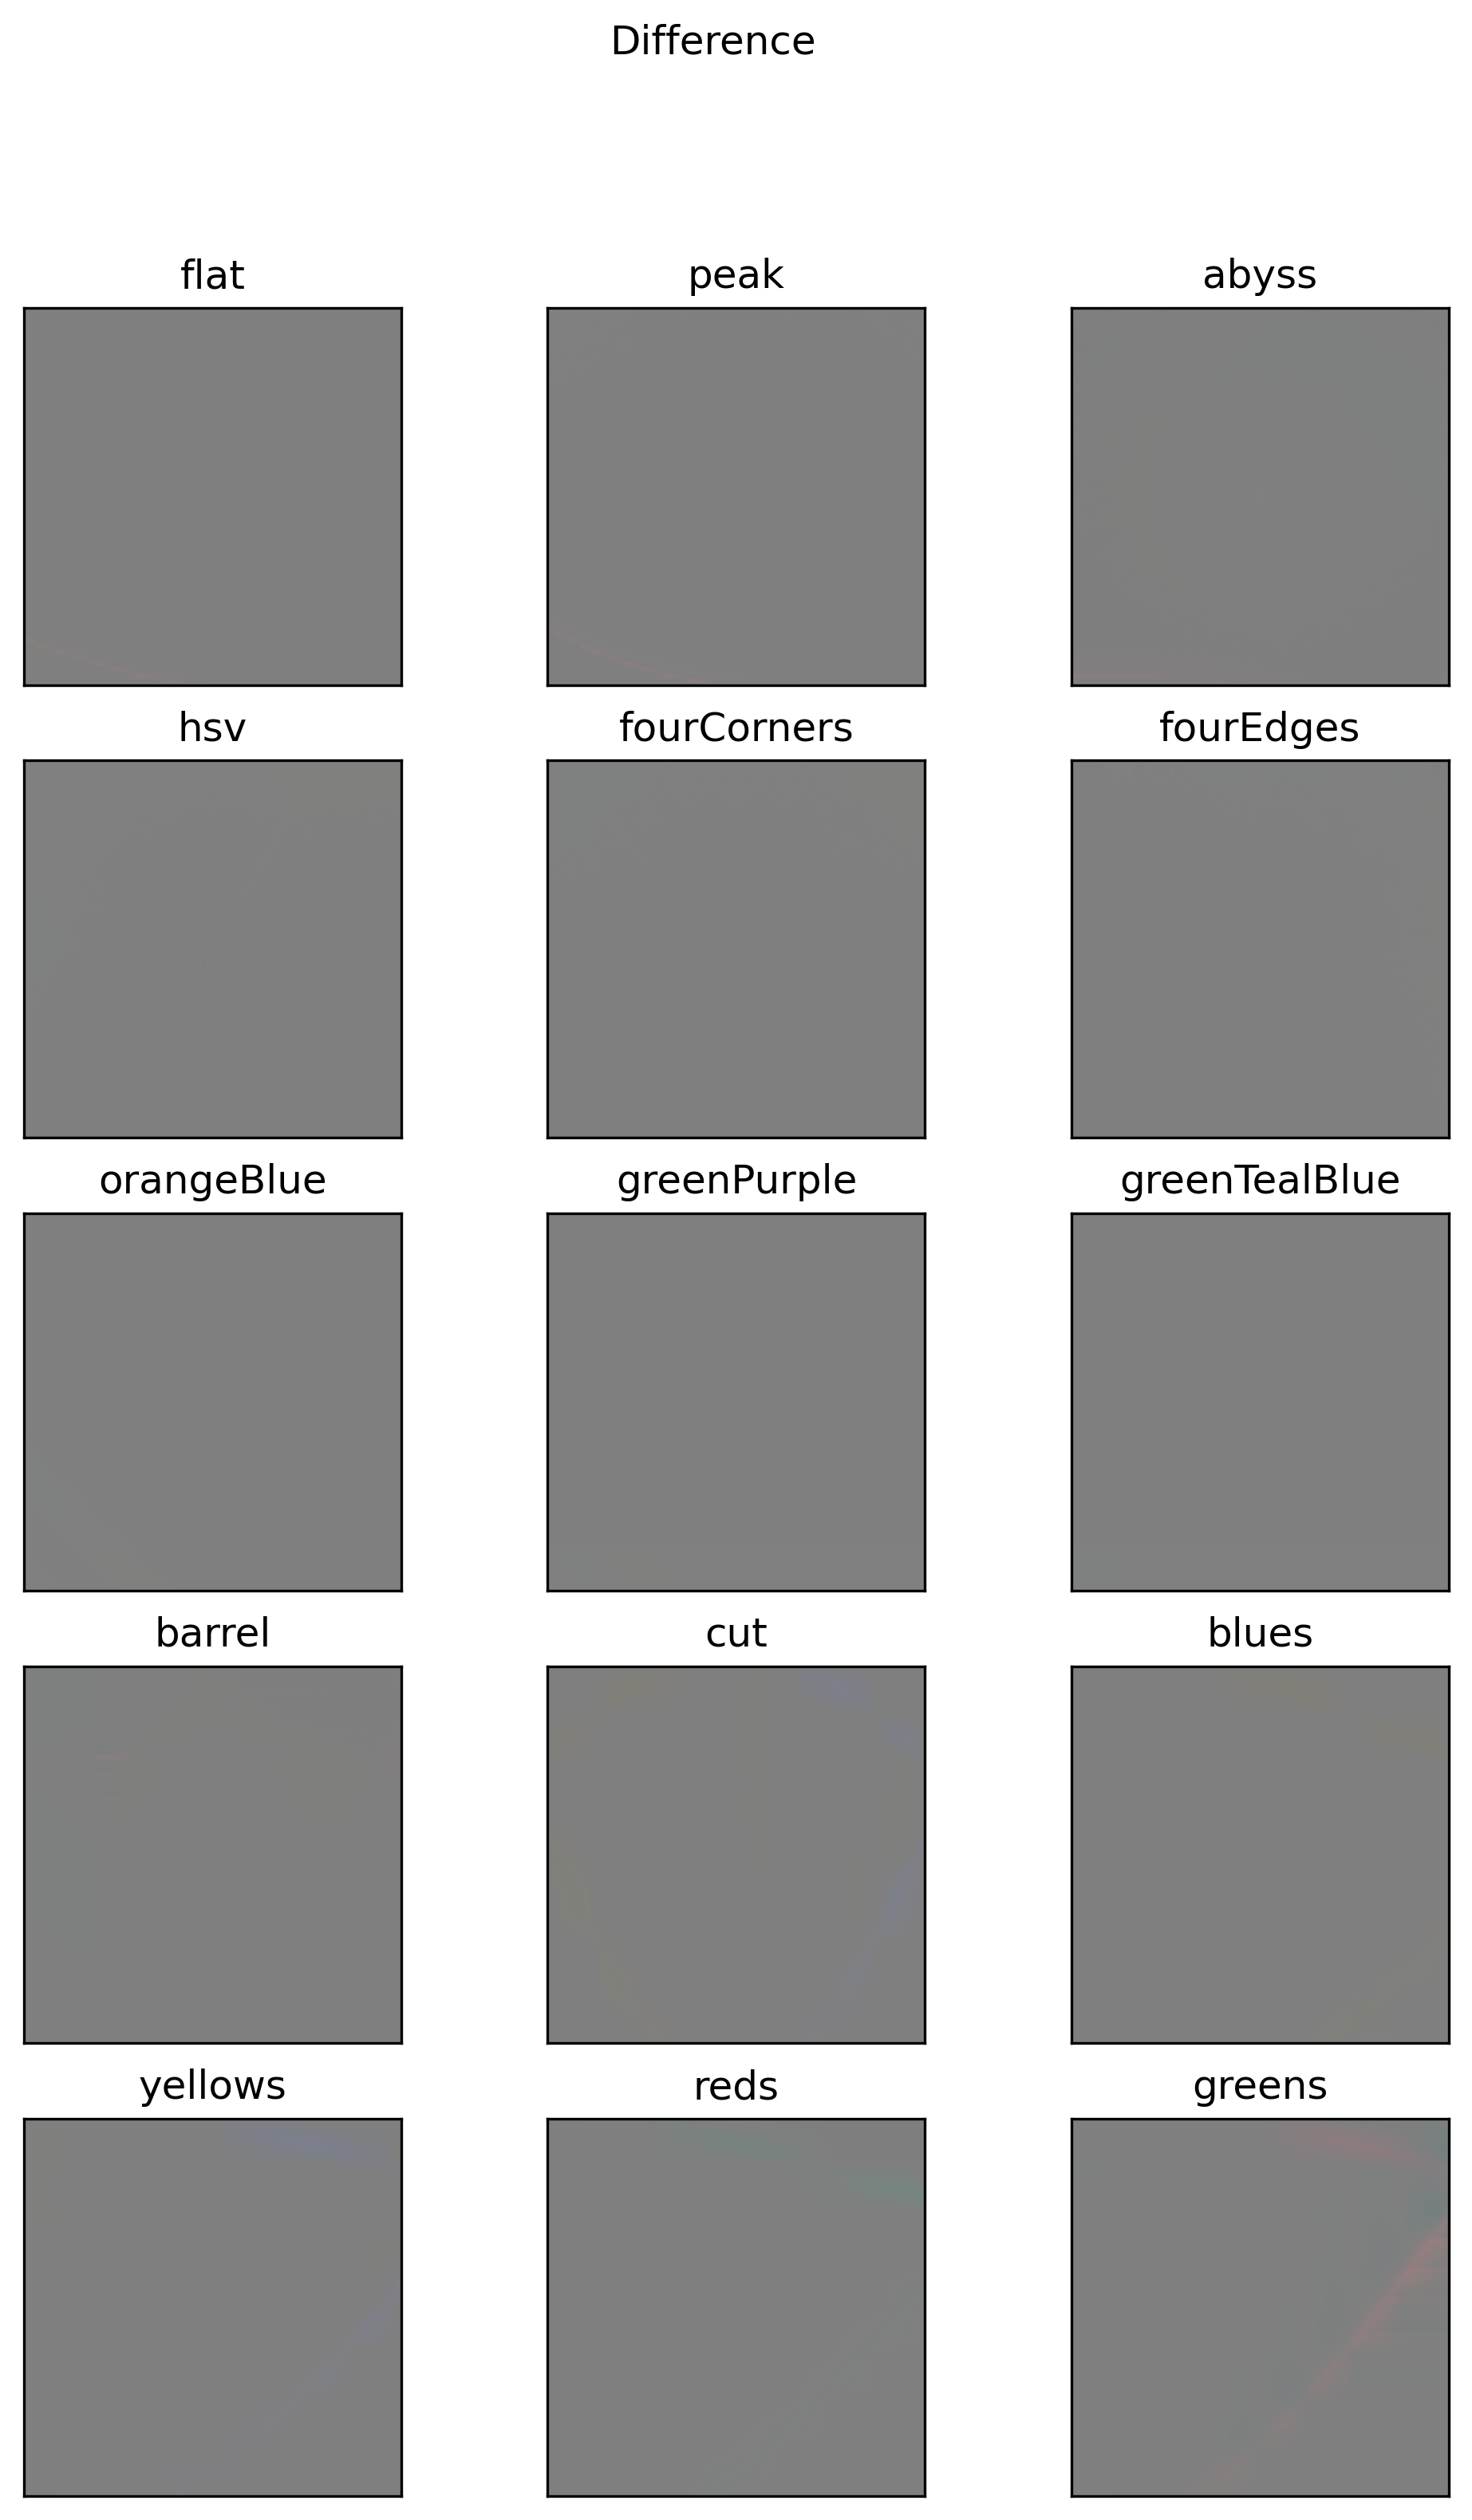

In [8]:
# reference image
fig, axes = plt.subplots(5,3, figsize = (8,19*5/8), dpi = 300)
axes = axes.ravel()


for i, name in enumerate(names):
    axes[i].imshow((reconstructed[i][:,:,:3] - references[i])+0.5, origin = 'lower')
    axes[i].set_title(name)
fig.suptitle('Difference')
    
for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
fig.patch.set_facecolor('white')
fig.patch.set_facecolor('white')
fig.savefig(f'Bi_diff.png')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.45603361409614585..1.049684156485678].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.45743599438663307..1.1251171875].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.3578343859733464..1.1021478203347126].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.04629997535514918..1.4755078687222103].


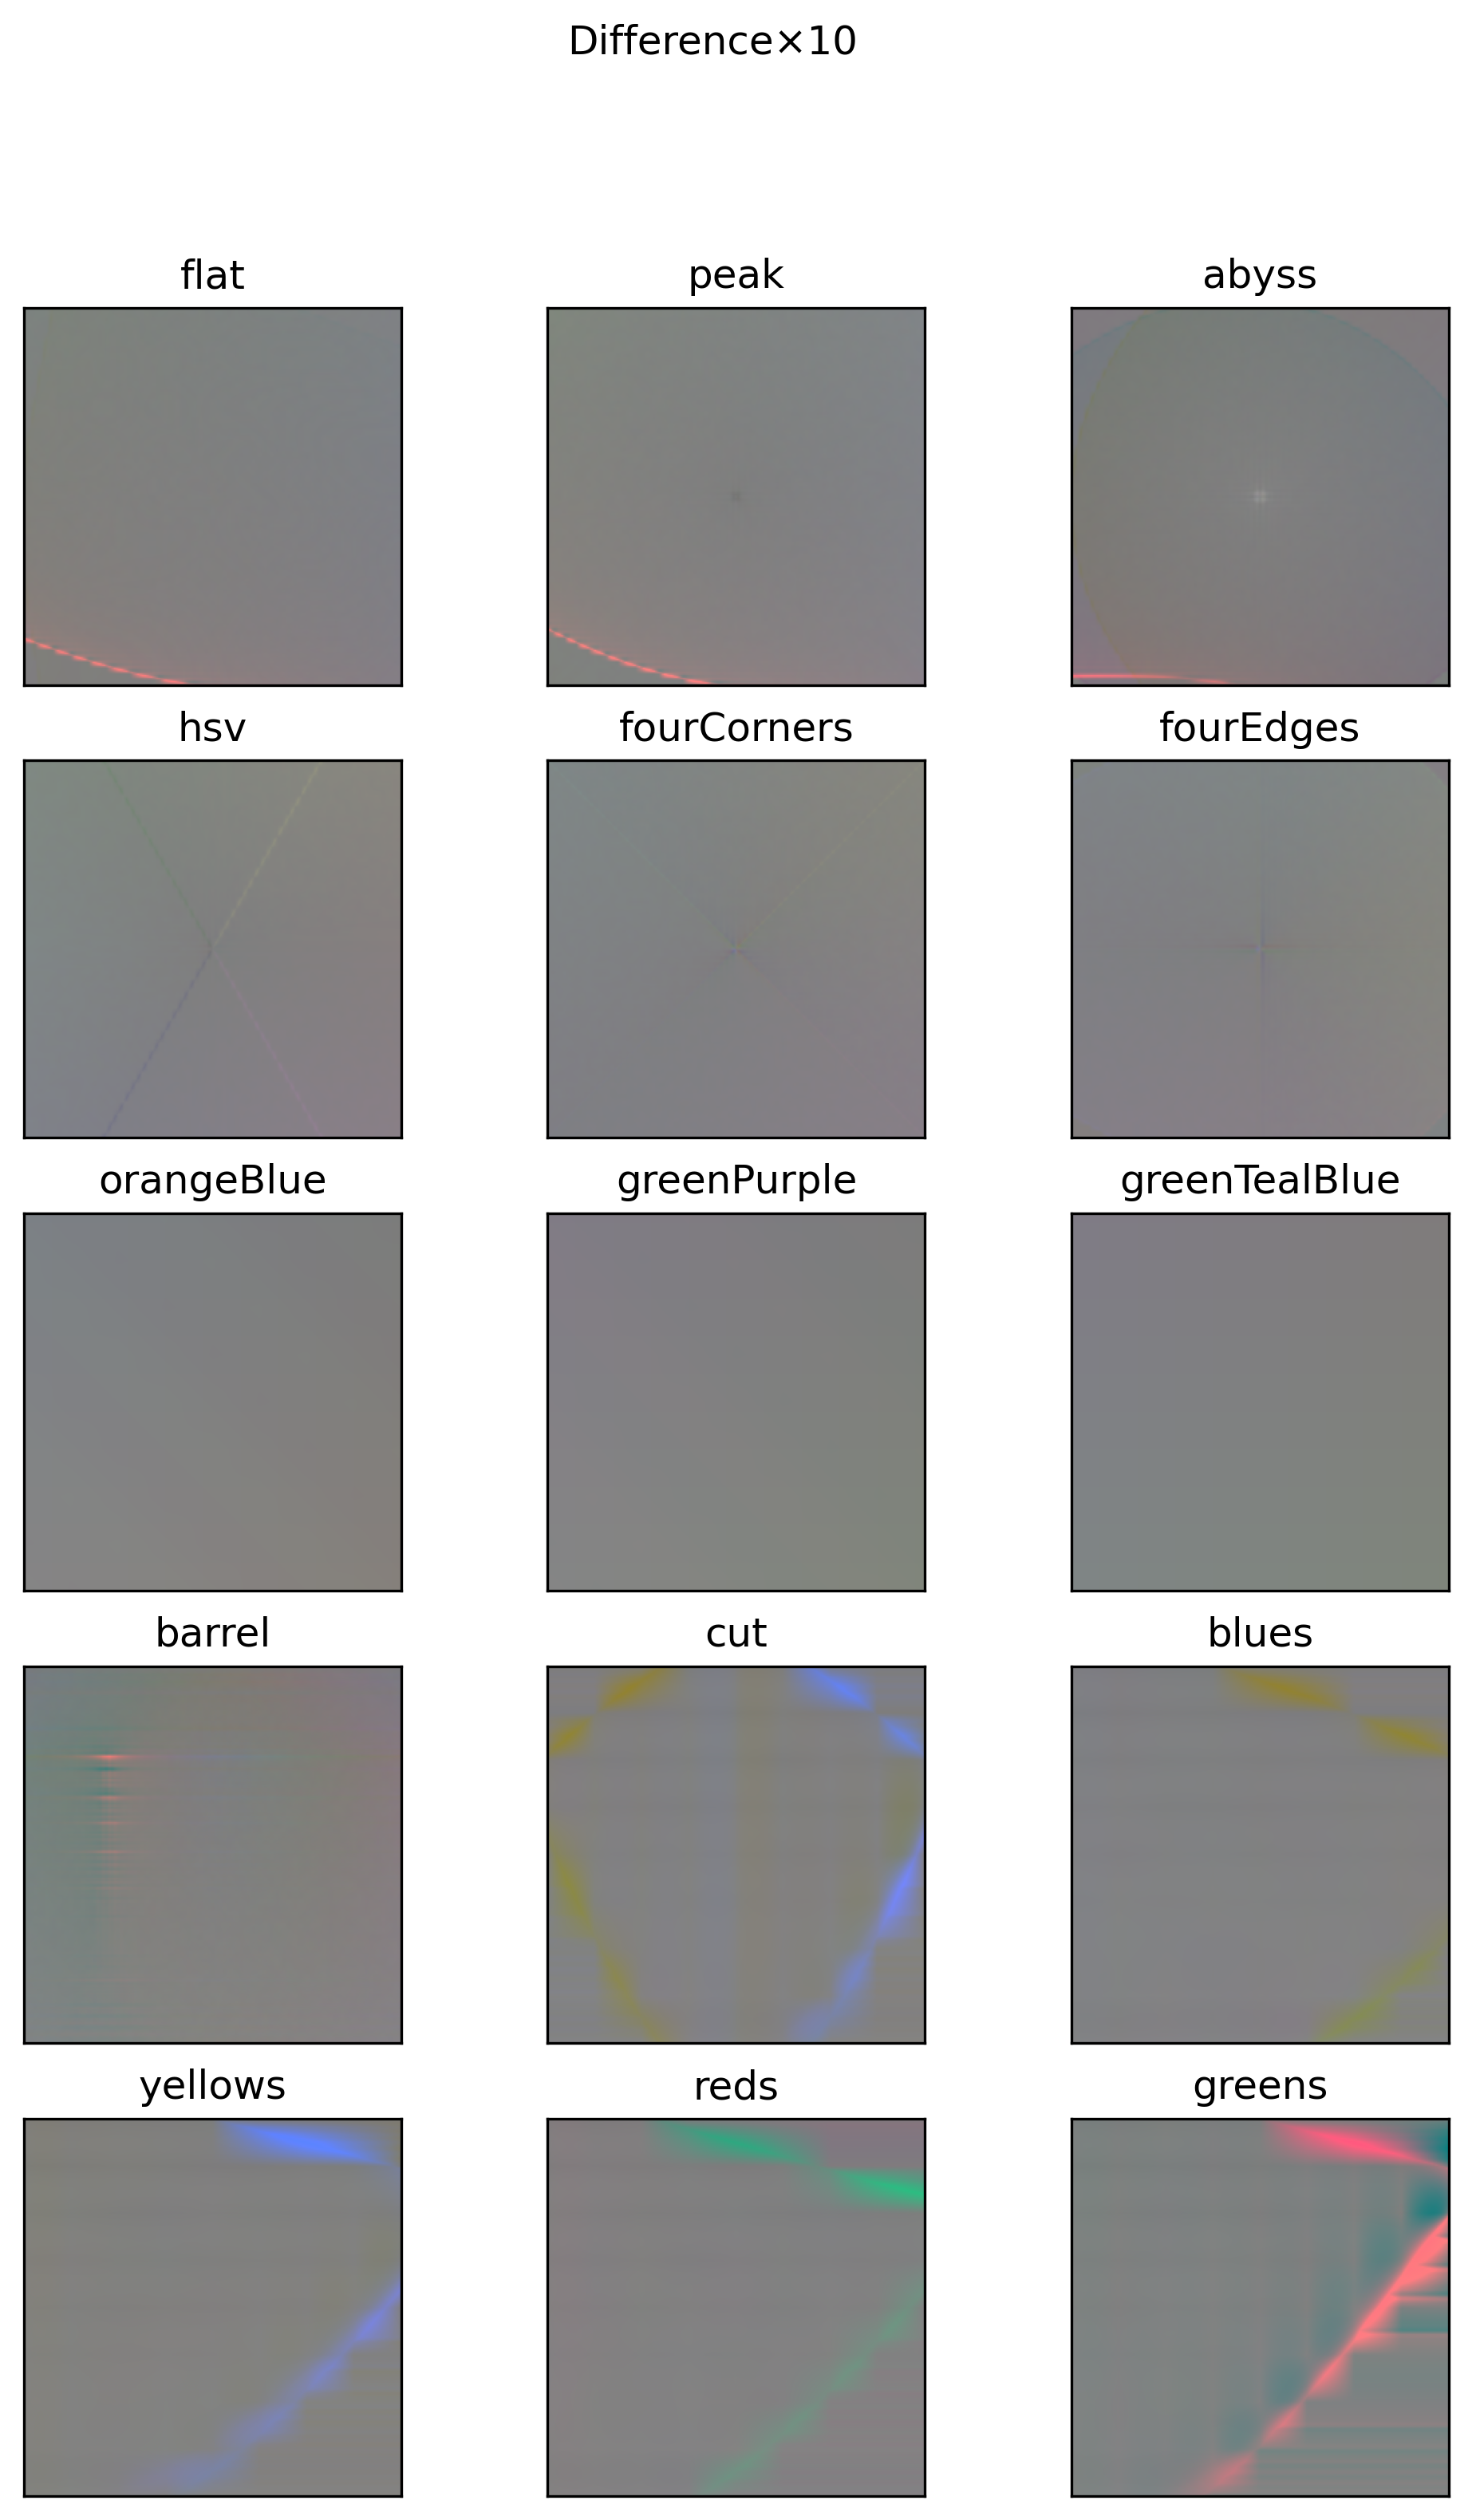

In [9]:
# reference image
fig, axes = plt.subplots(5,3, figsize = (8,19*5/8), dpi = 300)
axes = axes.ravel()


for i, name in enumerate(names):
    axes[i].imshow((reconstructed[i][:,:,:3] - references[i])*10+0.5, origin = 'lower')
    axes[i].set_title(name)
fig.suptitle('Difference×10')
    
for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
fig.patch.set_facecolor('white')
fig.patch.set_facecolor('white')
fig.savefig(f'Bi_diffx10.png')